交差検証
標本データを分割し、その一部をまず解析して、残る部分でその解析のテストを行い、解析自身の妥当性の検証・確認に当てる手法

https://k-dm.work/ja/eval/model-selection/crossvalidation/

---



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score

サンプルデータに対してモデルを作成し交差検証


---



In [5]:
RND=0

X, y = make_classification(
    n_samples=300,
    n_classes=2,
    n_informative=4,
    n_features=6,
    weights=[0.2, 0.8],
    n_clusters_per_class=2,
    shuffle=True,
    random_state=RND,
)

train_valid_X, test_X, train_valid_y, test_y = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RND
)

交差検証なしの場合のテストデータでのモデル精度
一度だけ train_test_split を実行してそのテストデータで評価します。

---



In [6]:
train_X, valid_X, train_y, valid_y = train_test_split(
    train_valid_X, train_valid_y, test_size=0.2, random_state=RND
)

model = RandomForestClassifier(max_depth=4, random_state=RND)
model.fit(train_X, train_y)
pred_y = model.predict(valid_X)
rocauc = roc_auc_score(valid_y, pred_y)
print(f"ROC-AUC = {rocauc}")

ROC-AUC = 0.8461538461538461


交差検証時のスコア
データを１０分割して交差検証をして、ROC-AUCの平均値を指標として使用します。sklearn.model_selection.cross_val_scoreを用いると複数の評価指標で簡単に交差検証のスコアを算出できます。 以下の例では、ROC-AUCとAccuracyを交差検証して求めます。

---



In [7]:
metrics = ("roc_auc", "accuracy")
model = RandomForestClassifier(max_depth=4, random_state=RND)
cv_scores = cross_validate(
    model, train_valid_X, train_valid_y, cv=5, scoring=metrics, return_train_score=True
)

for m in metrics:
    cv_m = cv_scores[f"test_{m}"]
    print(f"{m} {np.mean(cv_m)}")

roc_auc 0.9332538611485981
accuracy 0.875


テストデータでの性能

---



In [8]:
model = RandomForestClassifier(max_depth=4, random_state=RND).fit(
    train_valid_X, train_valid_y
)
pred_y = model.predict(test_X)
rocauc = roc_auc_score(test_y, pred_y)
print(f"test ROC-AUC = {rocauc}")

test ROC-AUC = 0.7083333333333333


**層状K分割交差検証**

---



In [14]:
pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 4.3 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=a931f0c61d6005e56bddabe3f2b2d510c5295cd7b2479ea0dd39c6bb505987ae
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score

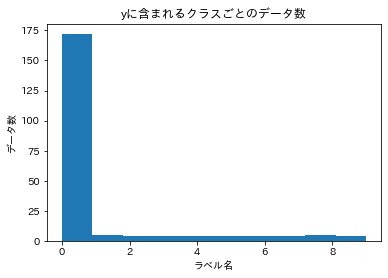

In [16]:
n_classes = 10
X, y = make_classification(
    n_samples=210,
    n_classes=n_classes,
    n_informative=n_classes,
    n_features=12,
    n_clusters_per_class=1,
    weights=[0.82, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02],  ## クラスごとの比率
    random_state=RND,
)
plt.title("yに含まれるクラスごとのデータ数")
plt.hist(y)
plt.xlabel("ラベル名")
plt.ylabel("データ数")
plt.show()

https://qiita.com/chorome/items/54e99093050a9473a189

分割したデータに含まれるラベルの比率

---



StratifiedKFold
訓練データと検証用データで、ラベルの比率が同じになっていることが確認できます。

---



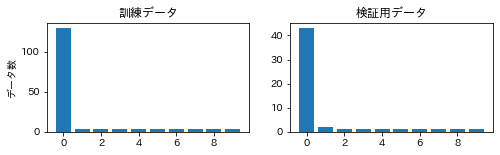

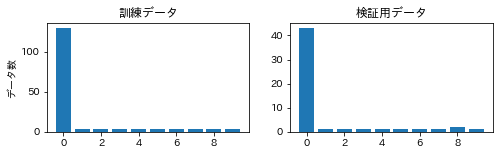

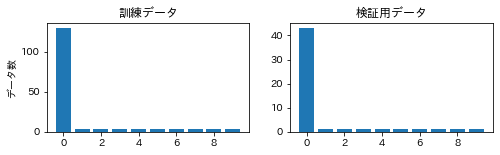

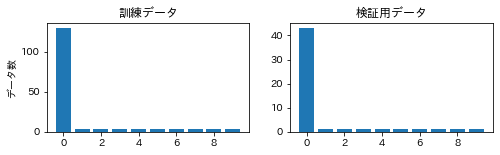

In [17]:
skf = StratifiedKFold(n_splits=4)

for train_index, valid_index in skf.split(X, y):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]
    # model = RandomForestClassifier(max_depth=5, random_state=RND)
    # model.fit(X_train, y_train)

    plt.figure(figsize=(8, 2))
    plt.subplot(121)
    plt.title("訓練データ")
    train_label_cnt = [(y_train == i).sum() for i in range(n_classes)]
    plt.ylabel("データ数")
    plt.bar(np.arange(n_classes), train_label_cnt)
    plt.subplot(122)
    plt.title("検証用データ")
    valid_label_cnt = [(y_valid == i).sum() for i in range(n_classes)]
    plt.bar(np.arange(n_classes), valid_label_cnt)
    plt.show()